In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

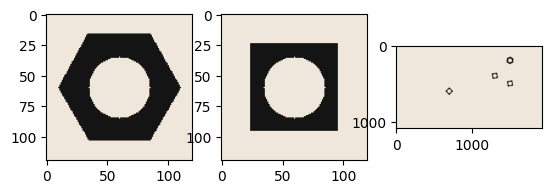

In [2]:
hexnut_template = cv.imread(r"E:\assignment 3\hexnut_template.png", cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r"E:\assignment 3\squarenut_template.png", cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r"E:\assignment 3\conveyor_f100.png", cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [3]:
gray_hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
gray_squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
gray_conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)